In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
import warnings
warnings.filterwarnings('ignore')

C:\Users\91916\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\91916\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\91916\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\91916\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

In [44]:
signs = {0:'Speed limit (20km/h)', 1:'Speed limit (30km/h)', 
         2:'Speed limit (50km/h)', 3:'Speed limit (60km/h)', 
         4:'Speed limit (70km/h)', 5:'Speed limit (80km/h)', 
         6:'End of speed limit (80km/h)', 7:'Speed limit (100km/h)', 
         8:'Speed limit (120km/h)', 9:'No passing', 
         10:'No passing for vehicles over 3.5 metric tons', 
         11:'Right-of-way at the next intersection', 12:'Priority road', 
         13:'Yield', 14:'Stop', 15:'No vehicles', 
         16:'Vehicles over 3.5 metric tons prohibited', 17:'No entry', 
         18:'General caution', 19:'Dangerous curve to the left', 
         20:'Dangerous curve to the right', 21:'Double curve', 
         22:'Bumpy road', 23:'Slippery road', 
         24:'Road narrows on the right', 25:'Road work', 
         26:'Traffic signals', 27:'Pedestrians', 28:'Children crossing', 
         29:'Bicycles crossing', 30:'Beware of ice/snow', 
         31:'Wild animals crossing', 32:'End of all speed and passing limits', 
         33:'Turn right ahead', 34:'Turn left ahead', 35:'Ahead only', 
         36:'Go straight or right', 37:'Go straight or left', 
         38:'Keep right', 39:'Keep left', 40:'Roundabout mandatory', 
         41:'End of no passing', 42:'End of no passing by vehicles over 3.5 metric tons'}

In [2]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [3]:
#Splitting training and testing dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=2)

print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape) 
print('y_train: ', y_train.shape) 
print('y_test: ', y_test.shape)

X_train:  (31367, 30, 30, 3)
X_test:  (7842, 30, 30, 3)
y_train:  (31367,)
y_test:  (7842,)


4


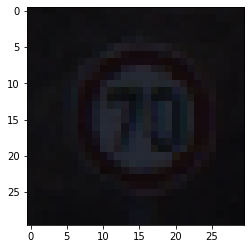

In [4]:
# Visualizing images from training data

i = 18000
plt.imshow(X_train[i])
print(y_train[i])

In [5]:
# Our data folder already has augmented images as well
# So, no need for image augmentation. We can directly build the model after some preprocessing

In [6]:
#Converting the labels into one hot encoding

from keras.utils import to_categorical

y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

Using TensorFlow backend.


In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from keras.optimizers import Adam

In [8]:
#Building the model

model = Sequential()

model.add(Conv2D(32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(32, kernel_size=(5,5), activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(43, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
epochs = 10
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 31367 samples, validate on 7842 samples
Epoch 1/10
31367/31367 [==============================] - 690s 22ms/step - loss: 2.7488 - accuracy: 0.2968 - val_loss: 1.3263 - val_accuracy: 0.6006
Epoch 2/10
31367/31367 [==============================] - 647s 21ms/step - loss: 1.2143 - accuracy: 0.6212 - val_loss: 0.5222 - val_accuracy: 0.8290
Epoch 3/10
31367/31367 [==============================] - 700s 22ms/step - loss: 0.7427 - accuracy: 0.7657 - val_loss: 0.2938 - val_accuracy: 0.9128
Epoch 4/10
31367/31367 [==============================] - 497s 16ms/step - loss: 0.5454 - accuracy: 0.8342 - val_loss: 0.2004 - val_accuracy: 0.9365
Epoch 5/10
31367/31367 [==============================] - 495s 16ms/step - loss: 0.4631 - accuracy: 0.8620 - val_loss: 0.1596 - val_accuracy: 0.9559
Epoch 6/10
31367/31367 [==============================] - 493s 16ms/step - loss: 0.3928 - accuracy: 0.8840 - val_loss: 0.1947 - val_accuracy: 0.9459
Epoch 7/1

In [11]:
model.save("my_model.h5")

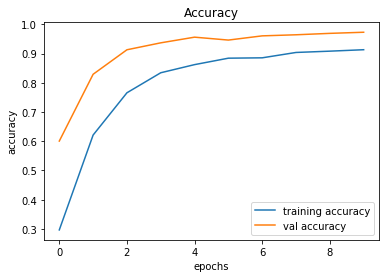

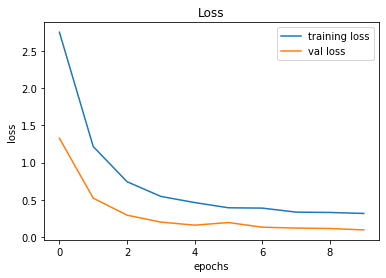

In [12]:
#plotting graphs for accuracy 

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [13]:
#testing accuracy on test dataset

y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred = model.predict_classes(X_test)

In [14]:
#Accuracy with the test data

from sklearn.metrics import accuracy_score
from sklearn import metrics

print('Accuracy Score: ')
print(accuracy_score(labels, pred))

Accuracy Score: 
0.9329374505146477


In [15]:
model.save("traffic_classifier.h5")